# kNN on Iris Dataset

# Import Libraries 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

# Load and explore the Dataset

In [2]:
iris_data = load_iris()    # Load data 
iris_data.data[:6]  


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [3]:
iris_data.DESCR   # Details of the Dataset

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
print(iris_data.feature_names)     # returns a list with the names of the dataset columns
print(iris_data.target)            # returns the classification target values
print(iris_data.target_names)    # returns a list with the names of target classes


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


# Plot the Data

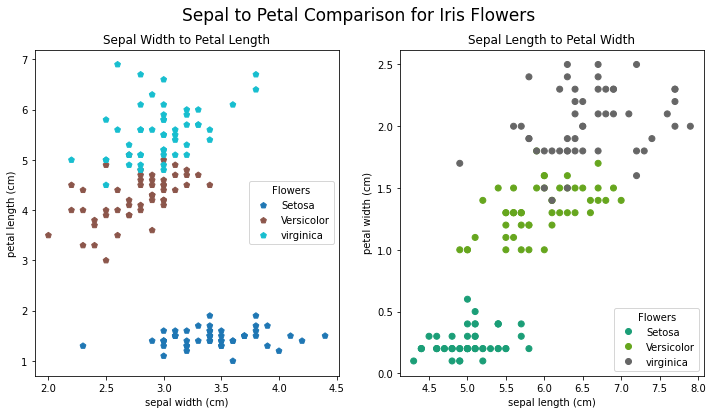

In [4]:
Flowers = ['Setosa', 'Versicolor', 'virginica']    #to pass as labels for legend 

#subplot to create a figure and place the two plots beside each other 
  #figure of 1 row and 2 cols           

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))                                                               
scatter1 = axes[0].scatter(iris_data.data[:,1],iris_data.data[:,2],c=iris_data.target, marker = "p" , cmap=plt.cm.tab10)
axes[0].set( xlabel = iris_data.feature_names[1] , ylabel = iris_data.feature_names[2] , title = 'Sepal Width to Petal Length' )
axes[0].legend(handles = scatter1.legend_elements()[0], 
         labels = Flowers,
          title = "Flowers" , loc = 'center right')

scatter2 = axes[1].scatter(iris_data.data[:,0],iris_data.data[:,3],c=iris_data.target, cmap=plt.cm.Dark2)
axes[1].set(xlabel = iris_data.feature_names[0] , ylabel = iris_data.feature_names[3] , title = 'Sepal Length to Petal Width')
axes[1].legend(handles = scatter2.legend_elements()[0], 
           labels = Flowers,
        title = "Flowers" , loc = 'lower right')

fig.suptitle('Sepal to Petal Comparison for Iris Flowers', fontsize = 17)   #title for the figure

plt.show()
fig.tight_layout()    #to minimize the overlapping and provide spacing


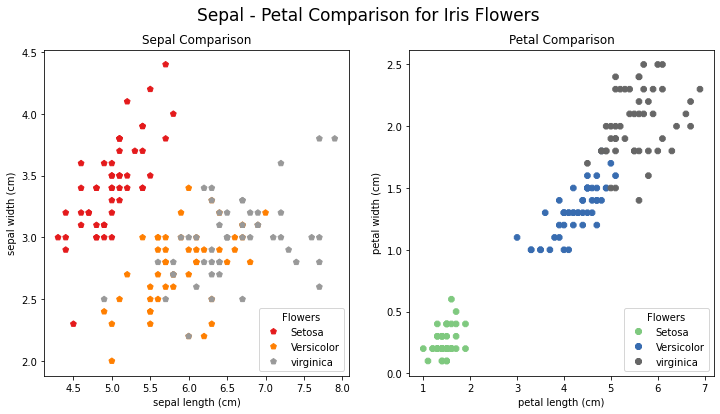

In [6]:
Flowers = ['Setosa', 'Versicolor', 'virginica'] 


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

scatter1 = axes[0].scatter(iris_data.data[:,0],iris_data.data[:,1],c=iris_data.target, marker = "p" , cmap=plt.cm.Set1)
axes[0].set( xlabel = iris_data.feature_names[0] , ylabel = iris_data.feature_names[1] , title = 'Sepal Comparison' )
axes[0].legend(handles = scatter1.legend_elements()[0], 
         labels = Flowers,
          title = "Flowers" , loc = 'lower right')

scatter2 = axes[1].scatter(iris_data.data[:,2],iris_data.data[:,3],c=iris_data.target, marker = '8', cmap=plt.cm.Accent)
axes[1].set(xlabel = iris_data.feature_names[2] , ylabel = iris_data.feature_names[3] , title = 'Petal Comparison')
axes[1].legend(handles = scatter2.legend_elements()[0], 
           labels = Flowers,
        title = "Flowers" , loc = 'lower right')

fig.suptitle('Sepal - Petal Comparison for Iris Flowers', fontsize = 17)

plt.show()
fig.tight_layout()


# Data Splitting 

In [7]:
#data and target 
idata = iris_data.data            
itarget = iris_data.target
print(idata.shape)
print(itarget.shape)


(150, 4)
(150,)


In [8]:
#split the data to train and test data
#the values are splitted into train and test data randomly
#putting a random state just to make sure that we obtain the same splitting every time we run code, it's just a constant that acts as a seed
#80% for training and 20% for testing

from sklearn.model_selection import train_test_split
idata_train,idata_test,itarget_train, itarget_test = train_test_split(idata, itarget,test_size=0.2,random_state=4)
print(idata_train.shape)
print(idata_test.shape)
print(f'Training set size: {idata_train.shape[0]} samples \nTest set size: {idata_test.shape[0]} samples')

(120, 4)
(30, 4)
Training set size: 120 samples 
Test set size: 30 samples


# Apply kNN

In [9]:
#fit the model on the training data with number of neighbors equals 3.

Knn = KNeighborsClassifier(n_neighbors = 3)      
Knn.fit(idata_train,itarget_train)                 
predict_target = Knn.predict(idata_test)              
accuracy_s = metrics.accuracy_score(itarget_test,predict_target)        
print("Accuracy Score(%) for k = 3 is {}".format(accuracy_s*100))

Accuracy Score(%) for k = 3 is 96.66666666666667


In [10]:
#we don't know which value of k will return the best accuracy
#so we try different values and compute the accuracy for every value
#apply knn for a range of k values

k_range = range(1,30)   # Range for number of neighbors
acc_scores = {}              # Empty dictionary to store the score values in a form of a key-value pair, where accuracy is the value, key is k value
acc_scores_list = []         # Empty list for appending the accuracy score after each iteration 

#apply Knn for each number of neighbors starting from 1 neighbor to 26 neighbors
for k in k_range:        
        Knn = KNeighborsClassifier(n_neighbors = k)      #Creating an instance of Knn
        Knn.fit(idata_train,itarget_train)                 #Fit the k-nearest neighbors classifier on the training dataset.
        predict_target = Knn.predict(idata_test)              #Predict the class labels for the provided test data.
        acc_scores[k] = metrics.accuracy_score(itarget_test,predict_target)        #calc accuracy classification score given the predicted labels and labels of test data 
        acc_scores_list.append(metrics.accuracy_score(itarget_test,predict_target))  #append the accuracy score to the scores_list

print("Accuracy Scores = {}".format(acc_scores))

Accuracy Scores = {1: 0.9333333333333333, 2: 0.9333333333333333, 3: 0.9666666666666667, 4: 0.9666666666666667, 5: 0.9666666666666667, 6: 0.9666666666666667, 7: 0.9666666666666667, 8: 0.9666666666666667, 9: 0.9666666666666667, 10: 0.9666666666666667, 11: 0.9666666666666667, 12: 0.9666666666666667, 13: 0.9666666666666667, 14: 0.9666666666666667, 15: 0.9666666666666667, 16: 0.9666666666666667, 17: 0.9666666666666667, 18: 0.9666666666666667, 19: 0.9666666666666667, 20: 0.9333333333333333, 21: 0.9666666666666667, 22: 0.9333333333333333, 23: 0.9666666666666667, 24: 0.9666666666666667, 25: 0.9666666666666667, 26: 0.9666666666666667, 27: 0.9666666666666667, 28: 0.9333333333333333, 29: 0.9333333333333333}


In [11]:
#try predictions, target of first 50 observations is Setosa, next 50 is Versicolor
#last 50 are Virginica 

pred = Knn.predict([idata[80]])
print(pred)         #output prediction is a target value of 0,1 or 2.

#to know the target name (flower) of this value
print(iris_data.target_names[pred])

[1]
['versicolor']


# Relationship between k and testing accuracy

Text(0, 0.5, 'Testing Accuracy')

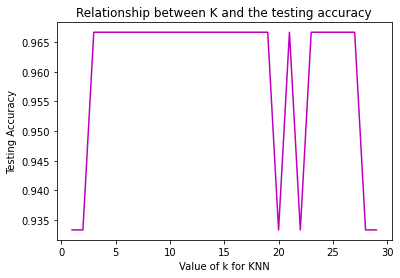

In [12]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,acc_scores_list,'m')
plt.title('Relationship between K and the testing accuracy')
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [13]:
#apply knn on the dataset with k value equals 2
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(idata,itarget)

KNeighborsClassifier(n_neighbors=2)

# Predict on a new data

In [14]:
#0 = setosa, 1=versicolor, 2=virginica
Class_Labels = {0:'setosa',1:'versicolor',2:'virginica'}

#predict on new values of the four features 
new_data = [[2,6,5,3],
         [3,5,7,2],[5,5,2,2]]
y_predict = knn.predict(new_data)

#to know the target name of the prediction
print(Class_Labels[y_predict[0]])   
print(Class_Labels[y_predict[1]])
print(Class_Labels[y_predict[2]])

versicolor
virginica
setosa
